In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from random import randrange


## Load in the data from the clusters

In [2]:
df_full = pd.read_csv('../data/cluster_rmsds_out.csv', index_col=[0])
df_full
#df_high = pd.read_csv('../data/cluster_rmsds_out_highest_100.csv', index_col=[0])

,Unnamed: 0,pdb_id,rmsd,members,0,1,2,3,4,5,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,length
0,35724,6ireA,52.157,4,0.000,0.129,0.129,4.268,4.268,4.268,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.00,234.0
1,23053,4mmvB,47.680,26,0.052,0.052,0.052,0.052,0.052,0.052,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.00,414.0
2,25625,4x5uA,40.906,11,0.000,0.000,0.000,0.000,0.000,0.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.00,226.0
3,36452,6mfzA,40.436,5,0.000,0.000,1.033,1.033,1.033,1.033,...,0.093,0.029,0.027,0.021,0.018,0.017,0.018,0.012,0.01,1024.0
4,20251,4e0sB,37.081,3,0.088,0.088,0.088,0.088,0.088,0.088,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.00,913.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38336,1947,1jjoC,0.000,2,NaN,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.00,1.0
38337,1948,1jjoE,0.000,2,NaN,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.00,1.0
38338,29950,5ljyH,0.000,2,NaN,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.00,1.0
38339,31215,5tkmA,0.000,2,NaN,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.00,1.0


## Drop the data outside of the desired range of sequence lengths

In [3]:
df = df_full.copy()
df = df.drop(df[df["length"] > 1000].index) 
df = df.drop(df[df["length"] == 1].index) 

## Calculate the median for each cluster

In [216]:
start = df.columns.get_loc("0")
medians = []
for i in range(len(df)):
    length = int(df.iloc[i, -1])
    medians.append(df.iloc[i, start:start+length].median())
df['median_rmsd'] = medians

## Plot the lengths of each cluster in a histogram

<AxesSubplot: xlabel='length', ylabel='Count'>

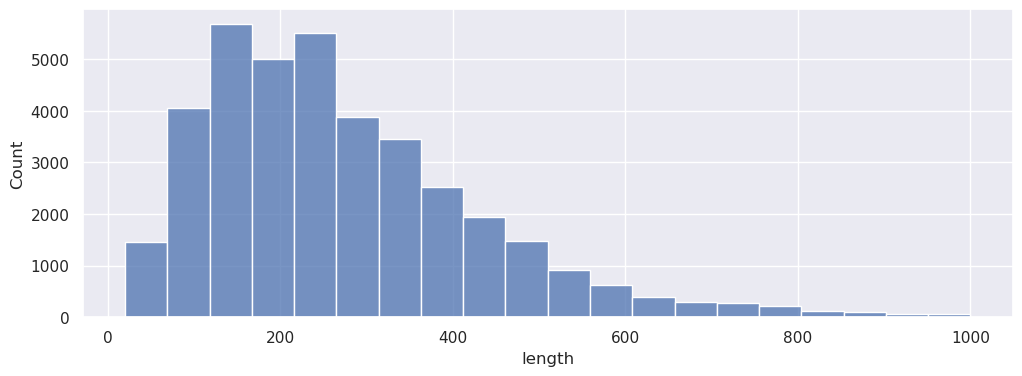

In [4]:
sns.set(rc={'figure.figsize':(12, 4)})
sns.histplot(data=df, x="length", bins=20)

## Plot the maximum RMSD of each cluster in a histogram

<AxesSubplot: xlabel='rmsd', ylabel='Count'>

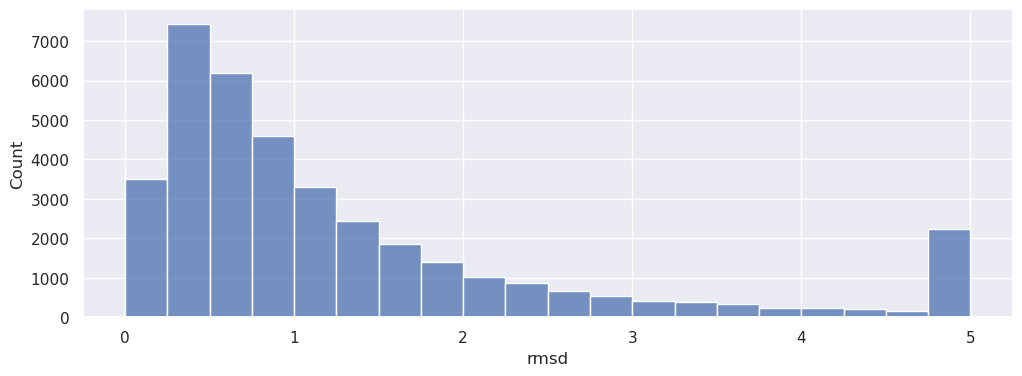

In [5]:
sns.set(rc={'figure.figsize':(12,4)})
df_rmsd = df.copy()
df_rmsd.loc[df_rmsd['rmsd'] > 5, 'rmsd'] = 5
sns.histplot(data=df_rmsd, x="rmsd", bins=20,)

## Plot the median RMSD of each cluster in a histogram

<AxesSubplot: xlabel='median_rmsd', ylabel='Count'>

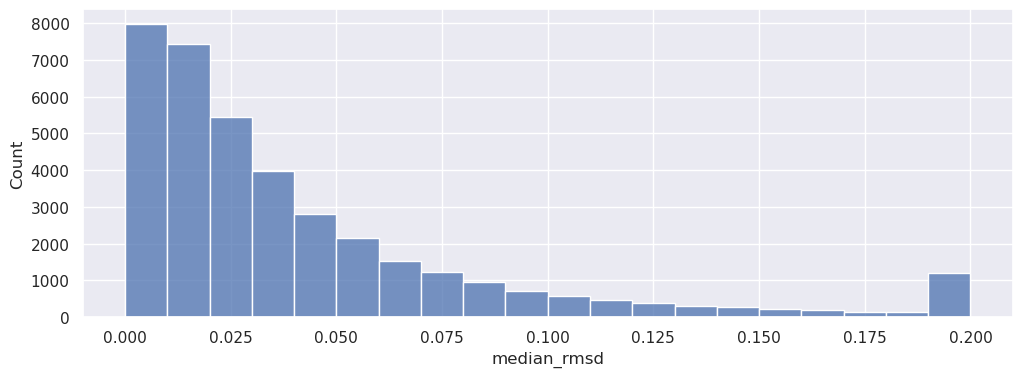

In [221]:
sns.set(rc={'figure.figsize':(12, 4)})
df_median = df.copy()
df_median.loc[df_median['median_rmsd'] > 0.20, 'median_rmsd'] = 0.20
sns.histplot(data=df_median, x="median_rmsd", bins=20)

## Filter the dataset based on length, RMSD and median local RMSD

In [6]:
MAX_LENGTH = 400
MIN_LENGTH = 50
MIN_RMSD = 1
MAX_MEDIAN = 0.10

print('Sequences longer than', str(MAX_LENGTH), 'residues: {0:.4g}'.format(len(df[df["length"] > MAX_LENGTH].index) * 100 / len(df)), '%')
print('Sequences shorter than ' + str(MIN_LENGTH), 'residues: {0:.4g}'.format(len(df[df["length"] < MIN_LENGTH].index) * 100 / len(df)), '%')
print('Sequences with a maximum RMSD lower than', str(MIN_RMSD), ': {0:.4g}'.format(len(df[df["rmsd"] < MIN_RMSD].index) * 100 / len(df)), '%')
#print('Sequences with a median RMSD higher than', str(MAX_MEDIAN), ': {0:.4g}'.format(len(df[df["median_rmsd"] > MAX_MEDIAN].index) * 100 / len(df)), '%')

df2 = df.copy()
print('Before:', len(df2))

df2 = df2.drop(df2[df2["length"] > MAX_LENGTH].index)
df2 = df2.drop(df2[df2["length"] < MIN_LENGTH].index)
df2 = df2.drop(df2[df2["rmsd"] < MIN_RMSD].index)
#df2 = df2.drop(df2[df2["median_rmsd"] > MAX_MEDIAN].index)

print('After:', len(df2))
print('{0:.2g}'.format(len(df2) * 100 / len(df)) + '%')


Sequences longer than 400 residues: 18.29 %
Sequences shorter than 50 residues: 1.619 %
Sequences with a maximum RMSD lower than 1 : 57.11 %
Before: 38045
After: 13063
34%


In [7]:
df2

,Unnamed: 0,pdb_id,rmsd,members,0,1,2,3,4,5,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,length
0,35724,6ireA,52.157,4,0.000,0.129,0.129,4.268,4.268,4.268,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,234.0
2,25625,4x5uA,40.906,11,0.000,0.000,0.000,0.000,0.000,0.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,226.0
5,18167,3ur1C,36.150,4,0.541,1.710,1.710,1.710,1.710,1.710,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,85.0
7,27394,5d3aA,33.895,4,0.891,0.891,0.925,0.925,0.925,0.925,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,82.0
11,22361,4kmuA,32.359,116,0.000,0.000,0.020,0.109,0.154,1.496,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,329.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16470,38222,6vycA,1.000,2,0.000,0.000,0.000,0.000,0.000,0.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,374.0
16471,23135,4mxwD,1.000,4,0.000,0.000,0.000,0.000,0.000,0.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,210.0
16472,21829,4iulA,1.000,2,0.000,0.000,0.000,0.000,0.000,0.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,268.0
16474,16533,3porA,1.000,2,0.020,0.020,0.020,0.020,0.020,0.020,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,301.0


In [233]:
WINDOW_SIZE = 10
start = df2.columns.get_loc("0")

mean_start = df2.iloc[:, start:start+window_size].mean(axis=1)
selected_rows = df2[mean_start > threshold]

df_mid = df2.copy()
for i in range(len(df_mid)):
    length = int(df_mid.iloc[i]['length'])
    sequence = df_mid.iloc[i, start+WINDOW_SIZE:start+length-WINDOW_SIZE].tolist()
    df_mid.iloc[i, start:start+length] = sequence + [-1]*WINDOW_SIZE*2

df_mid
#print('In between:', selected_rows.iloc[randrange(len(selected_rows)), 1])

,Unnamed: 0,pdb_id,rmsd,members,0,1,2,3,4,5,...,1016,1017,1018,1019,1020,1021,1022,1023,length,median_rmsd
2,25625,4x5uA,40.906,11,0.085,0.085,0.085,0.109,0.119,0.104,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,226.0,0.0580
12,34263,6dm9A,32.038,6,0.048,0.044,0.040,0.035,0.029,0.027,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,78.0,0.0580
19,34264,6dm9B,30.418,6,0.095,0.086,0.097,0.095,0.088,0.081,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,78.0,0.0905
34,2453,1lxeA,26.623,3,0.027,0.027,0.024,0.020,0.013,0.026,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,101.0,0.0530
37,8161,2jkfA,25.965,18,0.240,0.072,0.071,0.078,0.089,0.072,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,179.0,0.0880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16470,38222,6vycA,1.000,2,0.000,0.000,0.000,0.000,0.000,0.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,374.0,0.0285
16471,23135,4mxwD,1.000,4,0.000,0.000,0.000,0.000,0.000,0.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,210.0,0.0105
16472,21829,4iulA,1.000,2,0.000,0.000,0.000,0.000,0.000,0.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,268.0,0.0525
16474,16533,3porA,1.000,2,0.018,0.023,0.029,0.027,0.030,0.029,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,301.0,0.0340


In [244]:
df_mid['max_rmsd'] = df2.iloc[:, start:start+500].max(axis=1)
df_mid['mid_rmsd'] = df_mid.iloc[:, start:start+500].max(axis=1)
df_mid

,Unnamed: 0,pdb_id,rmsd,members,0,1,2,3,4,5,...,1018,1019,1020,1021,1022,1023,length,median_rmsd,mid_rmsd,max_rmsd
2,25625,4x5uA,40.906,11,0.085,0.085,0.085,0.109,0.119,0.104,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,226.0,0.0580,16.187,16.187
12,34263,6dm9A,32.038,6,0.048,0.044,0.040,0.035,0.029,0.027,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,78.0,0.0580,13.346,13.346
19,34264,6dm9B,30.418,6,0.095,0.086,0.097,0.095,0.088,0.081,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,78.0,0.0905,11.688,11.688
34,2453,1lxeA,26.623,3,0.027,0.027,0.024,0.020,0.013,0.026,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,101.0,0.0530,108.934,108.934
37,8161,2jkfA,25.965,18,0.240,0.072,0.071,0.078,0.089,0.072,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,179.0,0.0880,62.332,62.332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16470,38222,6vycA,1.000,2,0.000,0.000,0.000,0.000,0.000,0.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,374.0,0.0285,3.478,3.478
16471,23135,4mxwD,1.000,4,0.000,0.000,0.000,0.000,0.000,0.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,210.0,0.0105,2.088,2.088
16472,21829,4iulA,1.000,2,0.000,0.000,0.000,0.000,0.000,0.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,268.0,0.0525,1.556,1.556
16474,16533,3porA,1.000,2,0.018,0.023,0.029,0.027,0.030,0.029,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,301.0,0.0340,7.761,7.761


### Generate a heatmap

ValueError: The number of FixedLocator locations (151), usually from a call to set_ticks, does not match the number of ticklabels (38073).

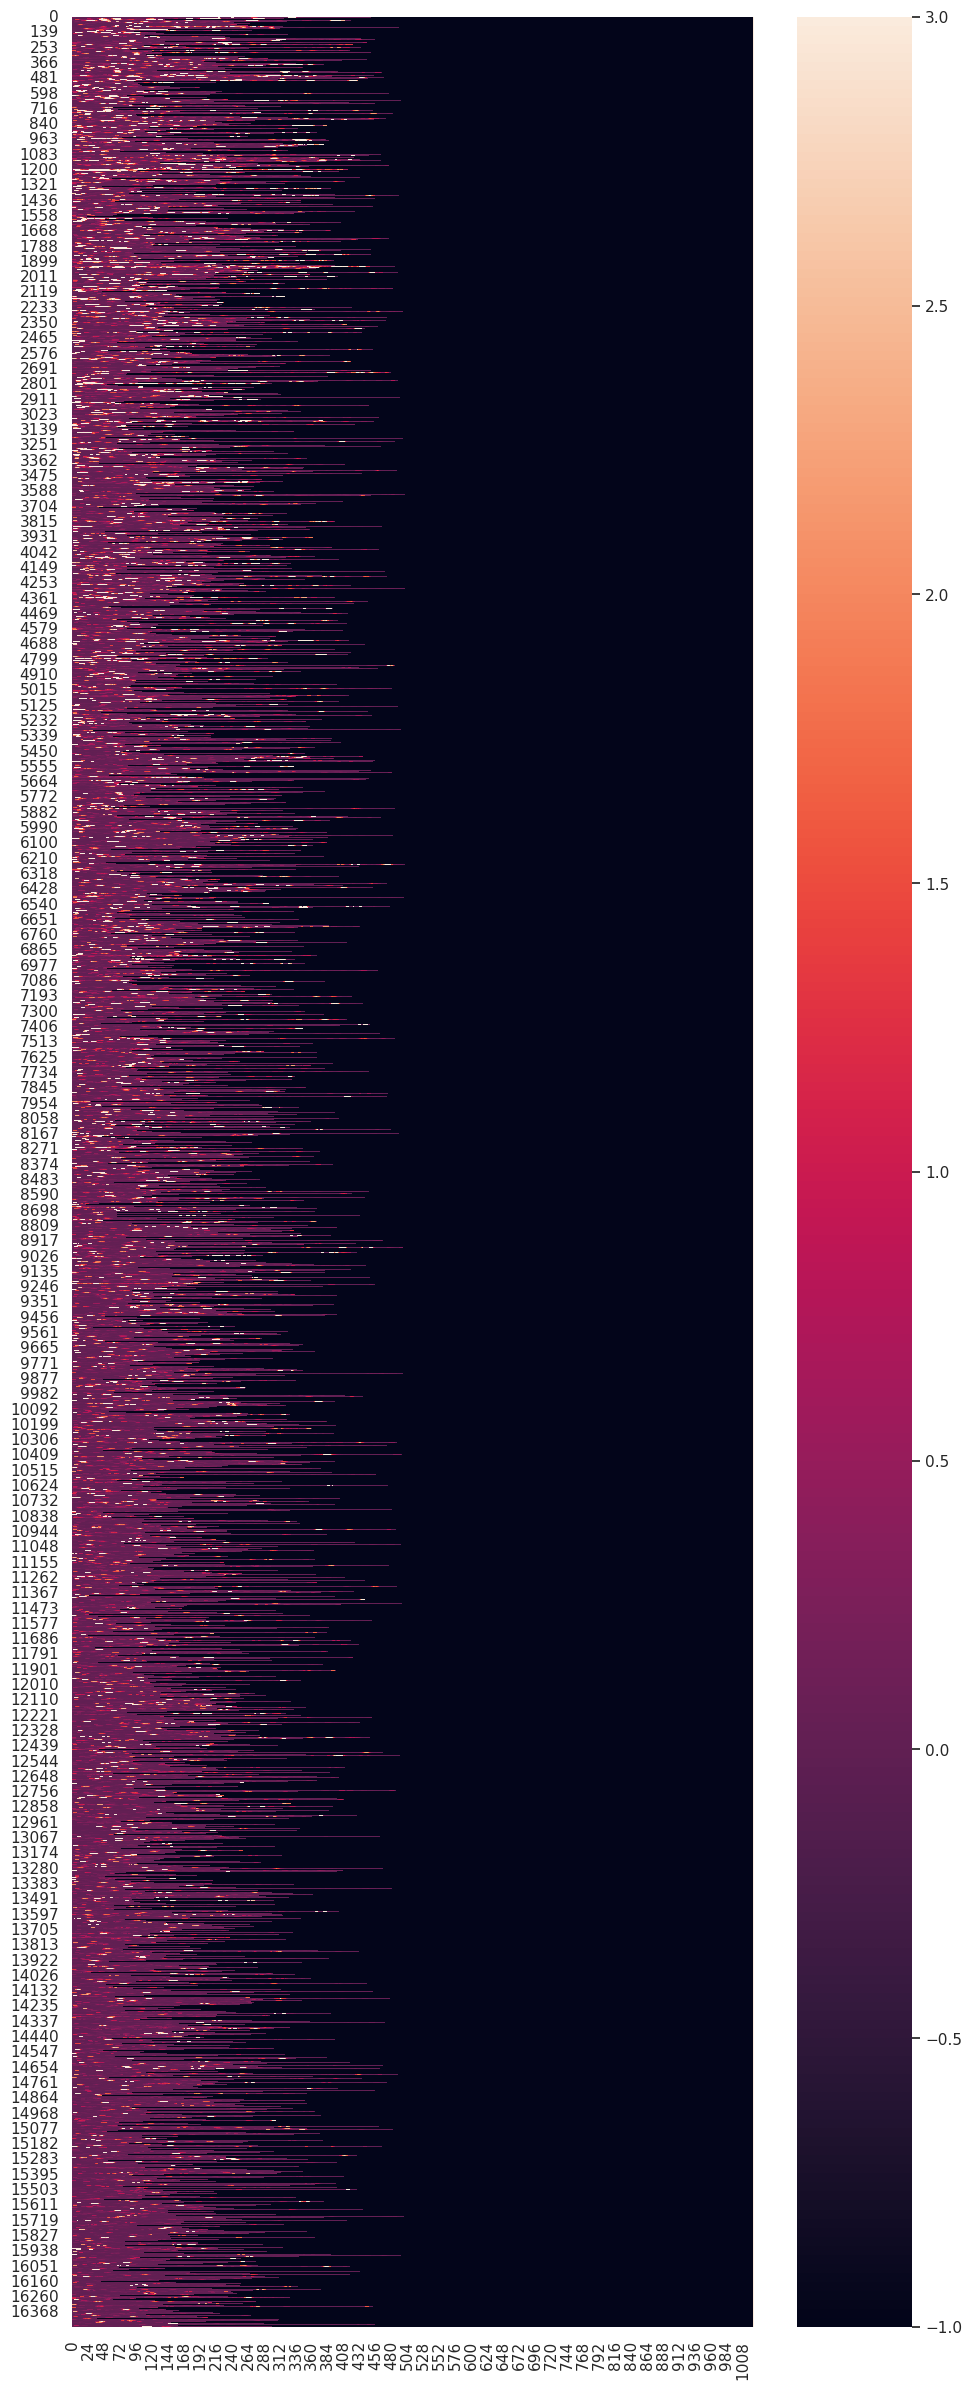

In [101]:
start = df2.columns.get_loc("0")
df_heatmap = df2.drop(df2.iloc[:, :start], axis=1)
sns.set(rc={'figure.figsize':(11, 30)})
ax = sns.heatmap(df_heatmap, vmin=-1, vmax=3)
ax.set_yticklabels(pdb_id)
plt.show()